# Laplacian spectrum of world's languages

In [15]:
import networkx as nx
import operator
import itertools
from nltk import sent_tokenize
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import numpy as np
import xml.etree.ElementTree as ET
import pickle
from collections import Counter
from numpy import linalg as LA
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import cluster
from matplotlib.text import TextPath
from sklearn.manifold import TSNE
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy

In [2]:
def extract_bible_text(lang):
    root = ET.fromstring(open(lang + '.xml').read())
    with open(lang + '.txt', 'w', encoding='utf-8') as out:
        for n in root.iter('seg'):
            try:
                out.write(n.text.strip() + '\n')
            except AttributeError:
                pass
    file = open(lang+'.txt', 'r') 
    bible=file.read().split('\n')
    #bible=[item for sublist in bible for item in sublist]
    return bible

## languages

In [3]:
#language_names = ['Latin','Spanish','French','Italian','Portuguese','Romanian']
language_names = ['Afrikaans','Arabic','Bulgarian','Croatian','Czech','Danish','Dutch','English',
                 'Esperanto','Finnish','French','German','Greek','Hebrew','Hungarian',
                 'Icelandic','Italian','Latin','Lithuanian','Norwegian','Polish','Portuguese',
                 'Romanian','Russian','Serbian','Slovak','Slovene','Spanish','Swedish','Turkish']

languages = {}
for language in language_names:
    languages[language]=extract_bible_text(language)#' '.join(extract_bible_text(language))

In [5]:
languages['English'][:10]

['In the beginning God created the heavens and the earth.',
 "Now the earth was formless and empty. Darkness was on the surface of the deep. God's Spirit was hovering over the surface of the waters.",
 'God said, "Let there be light," and there was light.',
 'God saw the light, and saw that it was good. God divided the light from the darkness.',
 'God called the light "day," and the darkness he called "night." There was evening and there was morning, one day.',
 'God said, "Let there be an expanse in the middle of the waters, and let it divide the waters from the waters."',
 'God made the expanse, and divided the waters which were under the expanse from the waters which were above the expanse; and it was so.',
 'God called the expanse "sky." There was evening and there was morning, a second day.',
 'God said, "Let the waters under the sky be gathered together to one place, and let the dry land appear"; and it was so.',
 'God called the dry land "earth," and the gathering together of th

In [6]:
languages['Latin'][:10]

['in principio creavit Deus caelum et terram',
 'terra autem erat inanis et vacua et tenebrae super faciem abyssi et spiritus Dei ferebatur super aquas',
 'dixitque Deus fiat lux et facta est lux',
 'et vidit Deus lucem quod esset bona et divisit lucem ac tenebras',
 'appellavitque lucem diem et tenebras noctem factumque est vespere et mane dies unus',
 'dixit quoque Deus fiat firmamentum in medio aquarum et dividat aquas ab aquis',
 'et fecit Deus firmamentum divisitque aquas quae erant sub firmamento ab his quae erant super firmamentum et factum est ita',
 'vocavitque Deus firmamentum caelum et factum est vespere et mane dies secundus',
 'dixit vero Deus congregentur aquae quae sub caelo sunt in locum unum et appareat arida factumque est ita',
 'et vocavit Deus aridam terram congregationesque aquarum appellavit maria et vidit Deus quod esset bonum']

In [7]:
languages['Greek'][:10]

['Εν αρχη εποιησεν ο Θεος τον ουρανον και την γην.',
 'Η δε γη ητο αμορφος και ερημος και σκοτος επι του προσωπου της αβυσσου. Και πνευμα Θεου εφερετο επι της επιφανειας των υδατων.',
 'Και ειπεν ο Θεος, Γενηθητω φως και εγεινε φως',
 'και ειδεν ο Θεος το φως οτι ητο καλον και διεχωρισεν ο Θεος το φως απο του σκοτους',
 'και εκαλεσεν ο Θεος το φως, Ημεραν το δε σκοτος εκαλεσε, Νυκτα. Και εγεινεν εσπερα και εγεινε πρωι, ημερα πρωτη.',
 'Και ειπεν ο Θεος, Γενηθητω στερεωμα αναμεσον των υδατων, και ας διαχωριζη υδατα απο υδατων.',
 'Και εποιησεν ο Θεος το στερεωμα, και διεχωρισε τα υδατα τα υποκατωθεν του στερεωματος απο των υδατων των επανωθεν του στερεωματος. Και εγεινεν ουτω.',
 'Και εκαλεσεν ο Θεος το στερεωμα, Ουρανον. Και εγεινεν εσπερα και εγεινε πρωι, ημερα δευτερα.',
 'Και ειπεν ο Θεος, Ας συναχθωσι τα υδατα τα υποκατω του ουρανου εις τοπον ενα, και ας φανη η ξηρα. Και εγεινεν ουτω.',
 'Και εκαλεσεν ο Θεος την ξηραν, γην και το συναγμα των υδατων εκαλεσε, Θαλασσας και ειδεν ο Θεο

In [8]:
languages['Swedish'][:10]

['I begynnelsen skapade Gud himmel och jord.',
 'Och jorden var öde och tom, och mörker var över djupet, och Guds Ande svävade över vattnet.',
 'Och Gud sade: »Varde ljus»; och det vart ljus.',
 'Och Gud såg att ljuset var gott; och Gud skilde ljuset från mörkret.',
 'Och Gud kallade ljuset dag, och mörkret kallade han natt.  Och det vart afton, och det vart morgon, den första dagen.',
 'Och Gud sade: »Varde mitt i vattnet ett fäste som skiljer vatten från vatten.»',
 'Och Gud gjorde fästet, och skilde vattnet under fästet från vattnet ovan fästet; och det skedde så.',
 'Och Gud kallade fästet himmel.  Och det vart afton, och det vart morgon, den andra dagen.',
 'Och Gud sade: »Samle sig det vatten som är under himmelen till en särskild plats, så att det torra bliver synligt.»  Och det skedde så.',
 'Och Gud kallade det torra jord, och vattensamlingen kallade han hav.  Och Gud såg att det var gott.']

In [9]:
languages['Spanish'][:10]

['En el principio creó Dios los cielos y la tierra',
 'Y la tierra estaba sin orden y vacía. Había tinieblas sobre la faz del océano, y el Espíritu de Dios se movía sobre la faz de las aguas',
 'Entonces dijo Dios: "Sea la luz", y fue la luz',
 'Dios vio que la luz era buena, y separó Dios la luz de las tinieblas',
 'Dios llamó a la luz Día, y a las tinieblas llamó Noche. Y fue la tarde y fue la mañana del primer día',
 'Entonces dijo Dios: "Haya una bóveda en medio de las aguas, para que separe las aguas de las aguas.',
 'E hizo Dios la bóveda, y separó las aguas que están debajo de la bóveda, de las aguas que están sobre la bóveda. Y fue así',
 'Dios llamó a la bóveda Cielos. Y fue la tarde y fue la mañana del segundo día',
 'Entonces dijo Dios: "Reúnanse las aguas que están debajo del cielo en un solo lugar, de modo que aparezca la parte seca." Y fue así',
 'Llamó Dios a la parte seca Tierra, y a la reunión de las aguas llamó Mares; y vio Dios que esto era bueno']

## tokenization

In [10]:
def clean(language):
    language=[[w.lower() for w in tokenizer.tokenize(sentence)] for sentence in language if len([w.lower() for w in tokenizer.tokenize(sentence)])>0]
    return language

In [11]:
for language in language_names:
    languages[language]=clean(languages[language])

In [12]:
words={}
for language in languages:
    words[language]=[len([item for sublist in languages[language] for item in sublist]),len(set([item for sublist in languages[language] for item in sublist])),Counter([item for sublist in languages[language] for item in sublist])]
    print(language,len(languages[language]),len([item for sublist in languages[language] for item in sublist]),len(set([item for sublist in languages[language] for item in sublist])))

Afrikaans 31163 799700 15151
Arabic 31101 440474 55511
Bulgarian 31071 646938 33999
Croatian 31073 573443 44816
Czech 31080 598710 40444
Danish 31103 658233 24030
Dutch 29004 727025 21252
English 31095 766605 12329
Esperanto 31102 686560 26875
Finnish 31018 543878 51355
French 31102 782838 20532
German 31102 700392 20364
Greek 31102 706866 36811
Hebrew 31102 415170 47666
Hungarian 31298 600620 63502
Icelandic 31086 667230 35172
Italian 31280 679747 29984
Latin 31211 534301 42089
Lithuanian 31101 471049 44731
Norwegian 31167 724592 18893
Polish 31364 604820 41748
Portuguese 31092 707005 26111
Romanian 31102 720900 20345
Russian 31102 565991 47403
Serbian 31070 585830 34316
Slovak 31172 621604 41909
Slovene 31102 648460 38722
Spanish 31100 718543 26308
Swedish 31168 733390 23649
Turkish 30209 451750 52226


In [13]:
most={}
for language in languages:
    most[language]=list(zip(*words[language][2].most_common(10000)))[0]

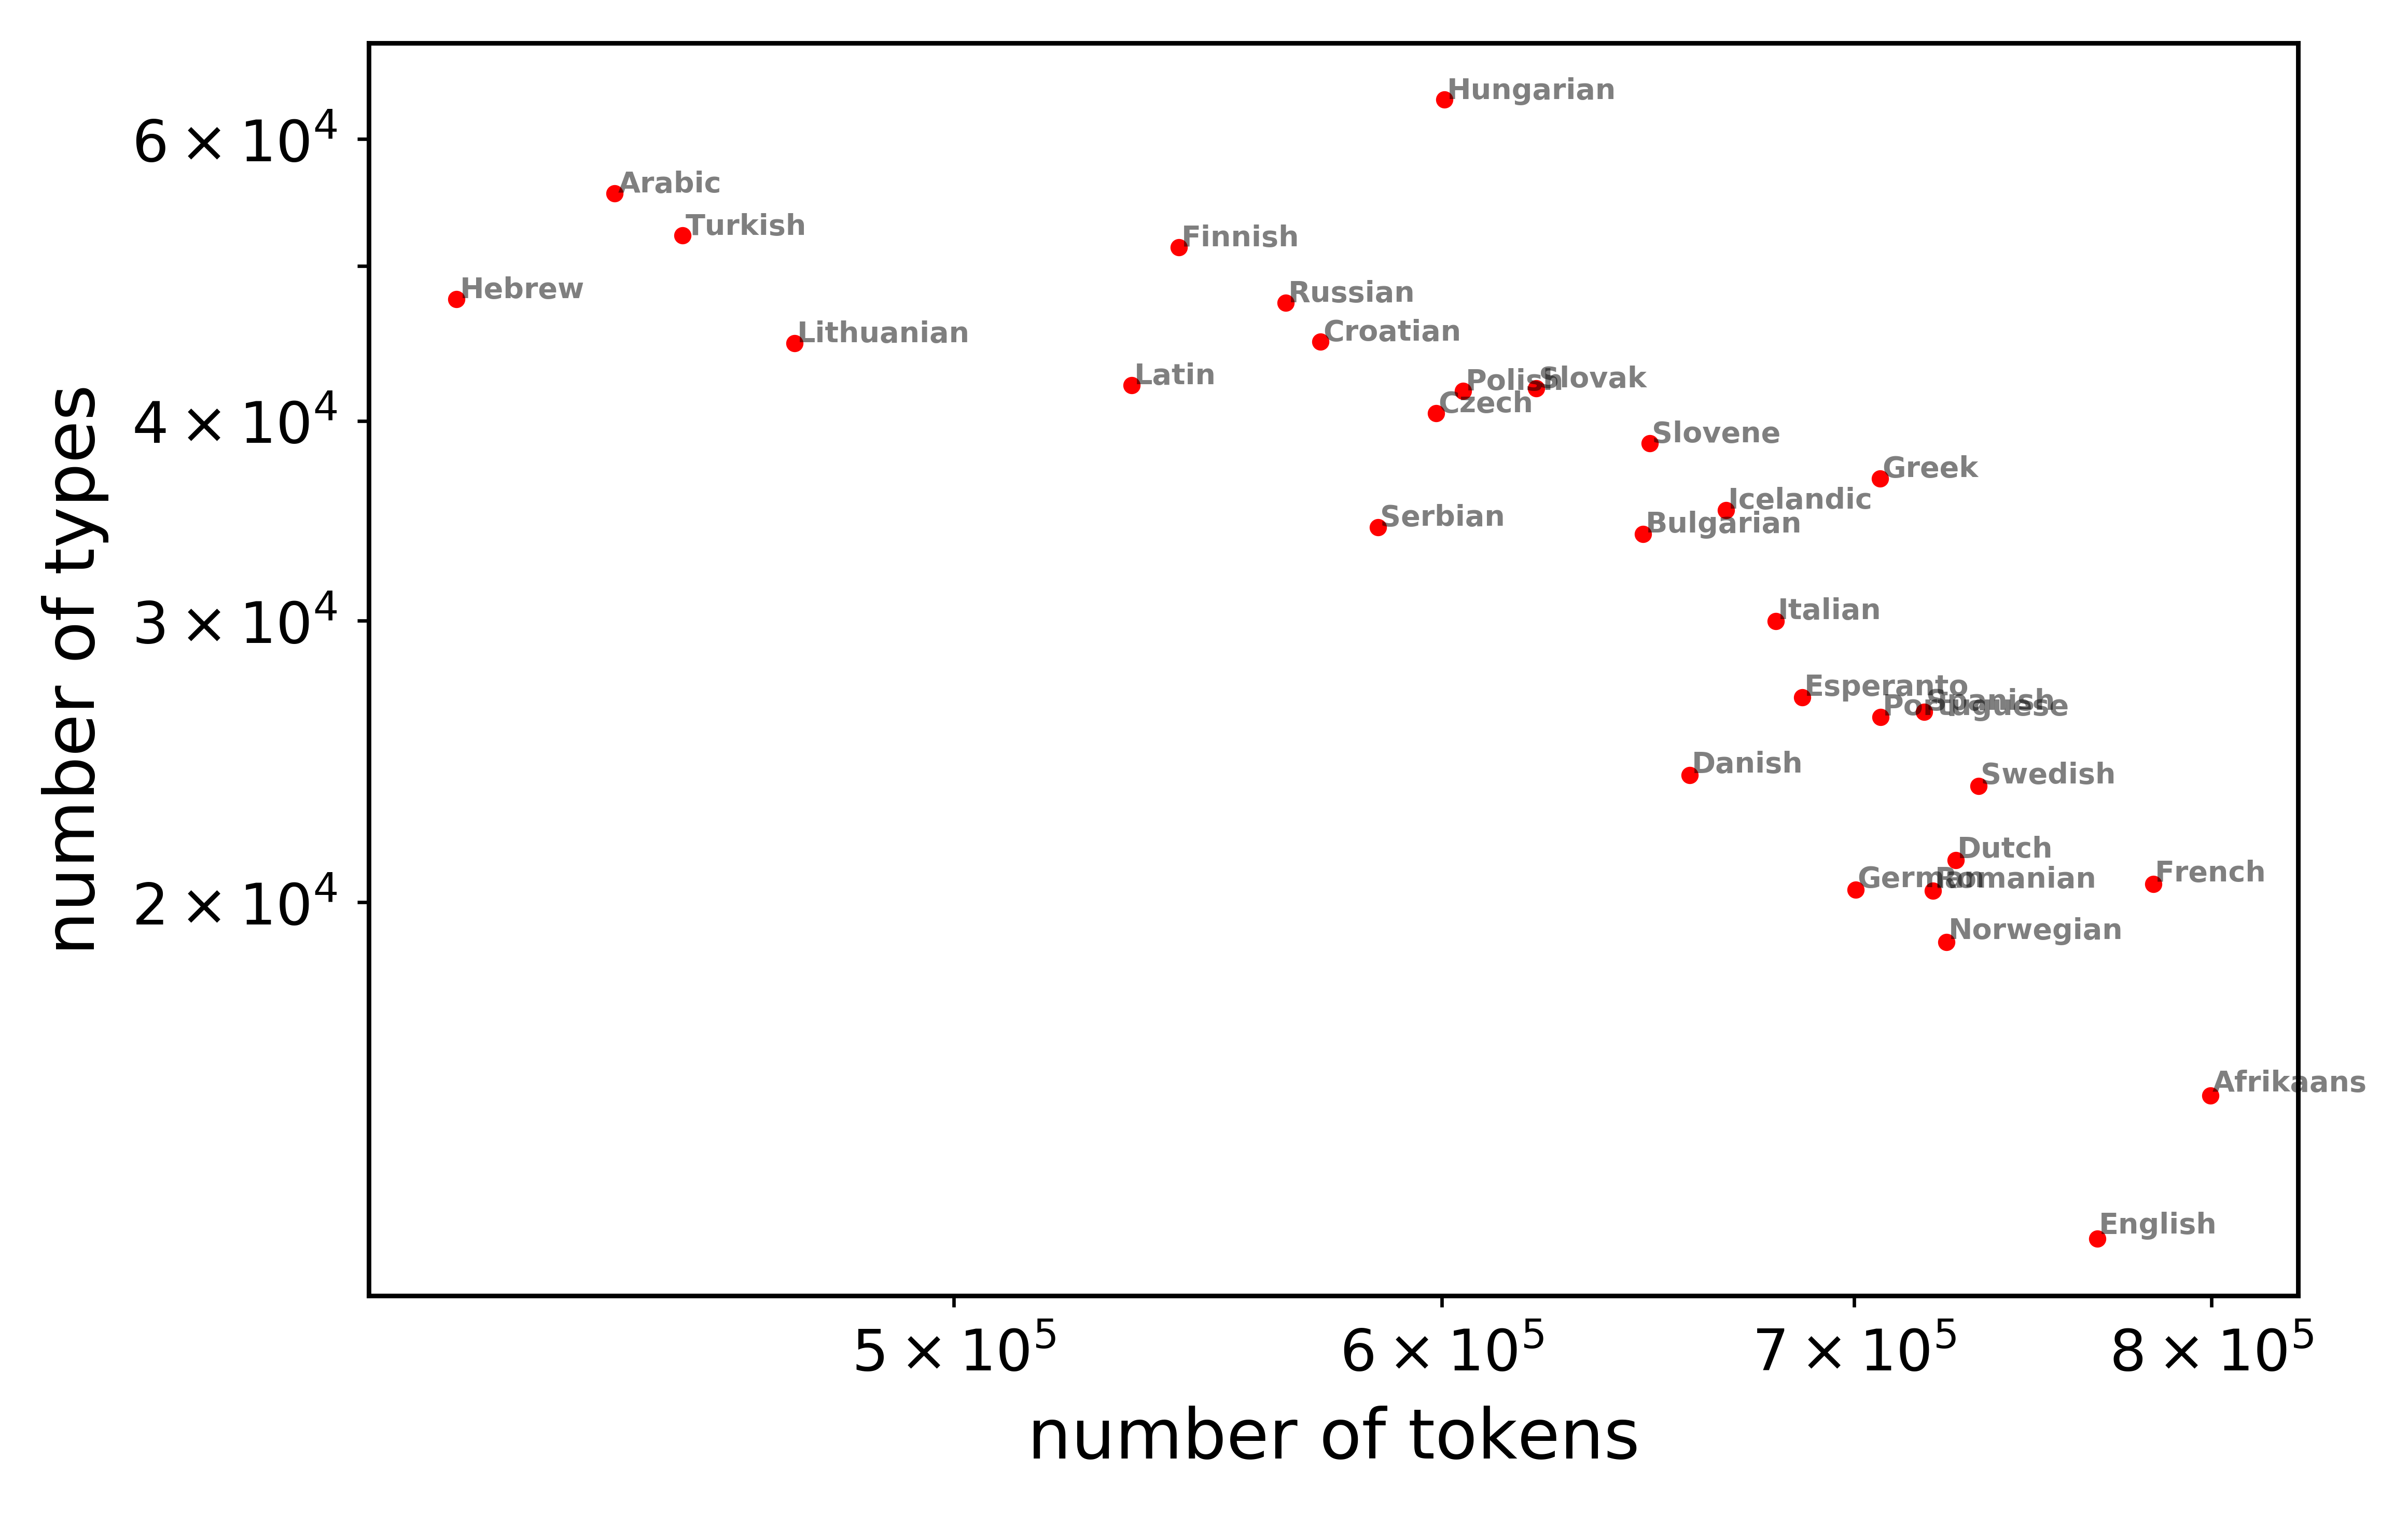

In [74]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(language_names)):
    x=words[language_names[i]][0]
    y=words[language_names[i]][1]

    ax.loglog(x,y,'o',color='r',markersize=2,markeredgewidth=1.,fillstyle='full',clip_on=True)
    ax.annotate(language_names[i], weight='demi', color='k', xy=(x+500,y+100), fontsize=5, alpha=0.5)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'number of types',fontsize=12)
plt.xlabel(r'number of tokens',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('words_languages.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [114]:
## co-occurence at distance 1
def GoW_adj(text_clean,language):
    W=most[language]
    G=nx.Graph()
    for sentence in text_clean:
        sentence=list(filter(lambda x: x in W, sentence))
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [115]:
graphs_adj={}
for language in language_names:
    print(language)
    G=GoW_adj(languages[language],language)
    graphs_adj[language]=G

Afrikaans
Arabic
Bulgarian
Croatian
Czech
Danish
Dutch
English
Esperanto
Finnish
French
German
Greek
Hebrew
Hungarian
Icelandic
Italian
Latin
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Russian
Serbian
Slovak
Slovene
Spanish
Swedish
Turkish


In [116]:
pickle.dump(graphs_adj,open('bible_graphs_adj.p','wb'))

In [89]:
graphs_adj=pickle.load(open('bible_graphs_adj.p','rb'))

In [10]:
for language in language_names:
    print(language,len(graphs_adj[language]))

Afrikaans 10000
Arabic 10000
Bulgarian 10000
Croatian 10000
Czech 10000
Danish 10000
Dutch 10000
English 10000
Esperanto 10000
Finnish 10000
French 10000
German 10000
Greek 10000
Hebrew 10000
Hungarian 10000
Icelandic 10000
Italian 10000
Latin 10000
Lithuanian 10000
Norwegian 10000
Polish 10000
Portuguese 10000
Romanian 10000
Russian 10000
Serbian 10000
Slovak 10000
Slovene 10000
Spanish 10000
Swedish 10000
Turkish 10000


## laplacian spectrum!

In [18]:
def eigs_laplacian_adj(language):
    G=graphs_adj[language]
    M=nx.normalized_laplacian_matrix(G,weight='weight').todense()
    return LA.eigvals(M)

In [112]:
eigs_adj={}
for language in language_names:
    print(language)
    L=list(np.round_(eigs_laplacian_adj(language),4))
    L.sort()
    eigs_adj[language]=[np.real(x) for x in L]

Afrikaans
Arabic
Bulgarian
Croatian
Czech
Danish
Dutch
English
Esperanto
Finnish
French
German
Greek
Hebrew
Hungarian
Icelandic
Italian
Latin
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Russian
Serbian
Slovak
Slovene
Spanish
Swedish
Turkish


In [113]:
pickle.dump(eigs_adj,open('eigs_adj.p','wb'))

In [13]:
eigs_adj=pickle.load(open('eigs_adj.p','rb'))

## histograms!

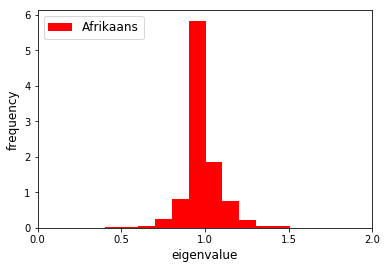

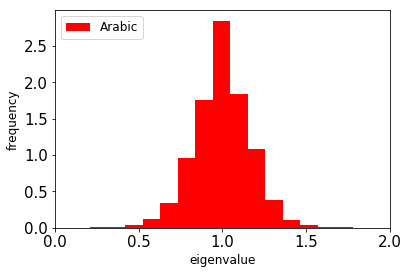

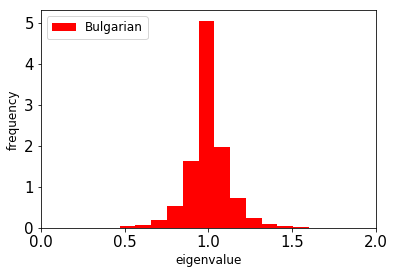

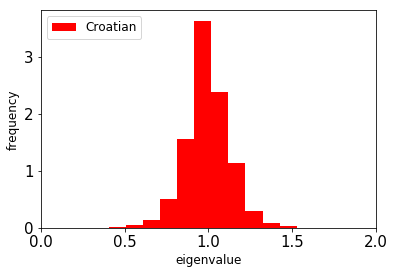

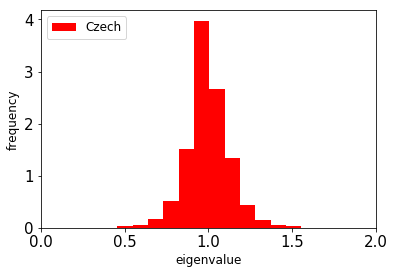

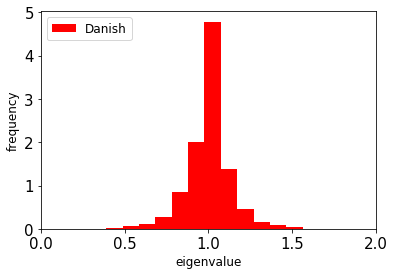

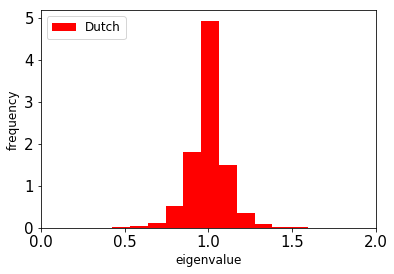

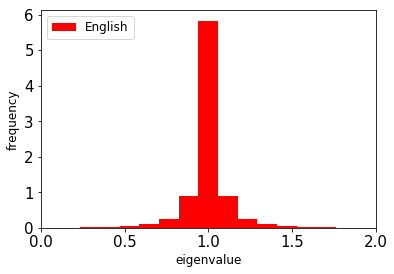

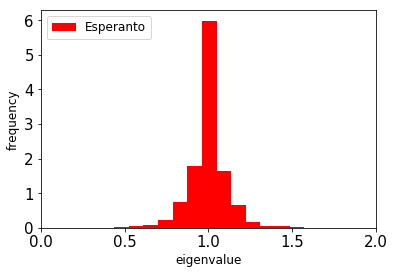

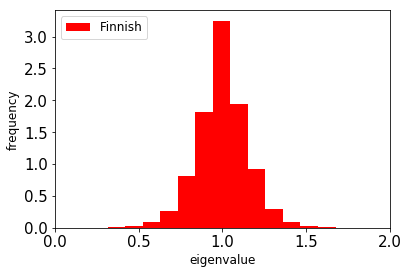

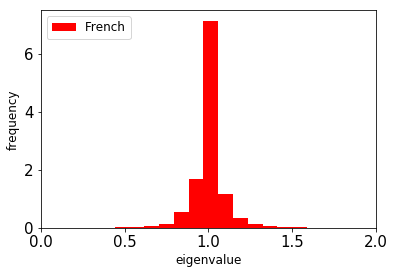

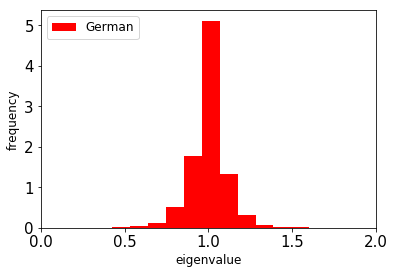

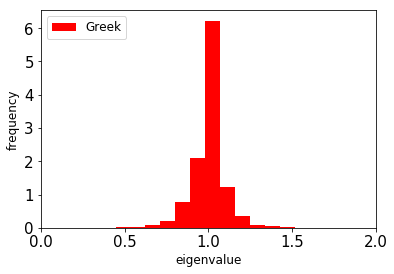

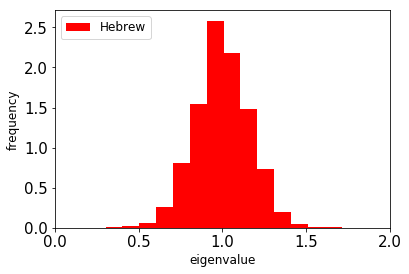

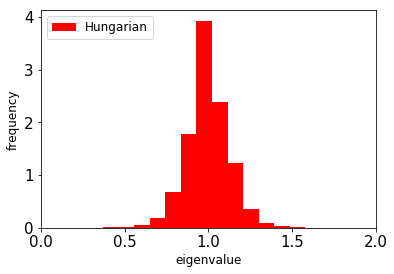

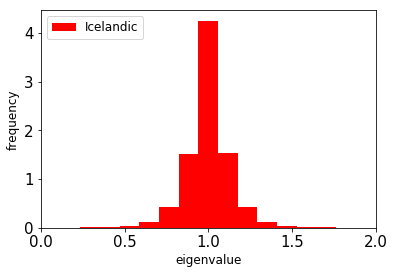

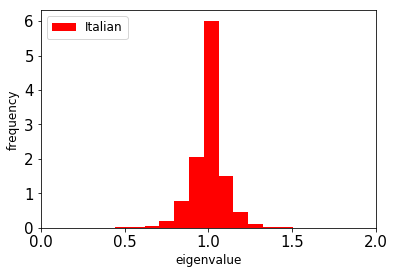

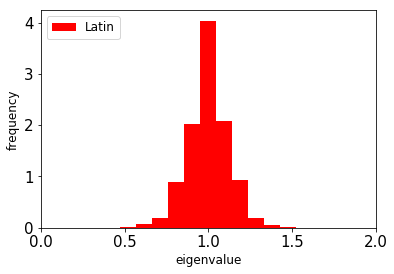

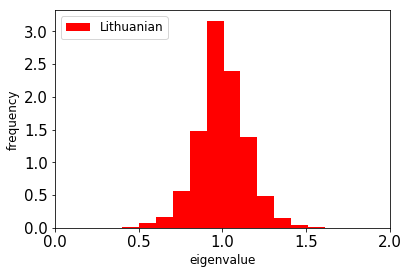

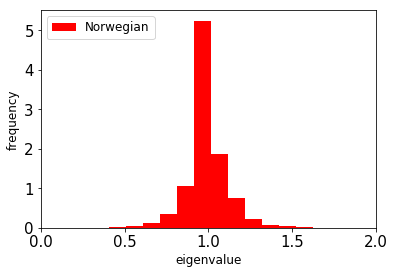

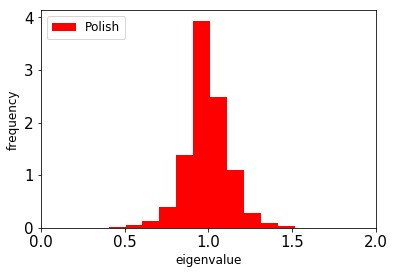

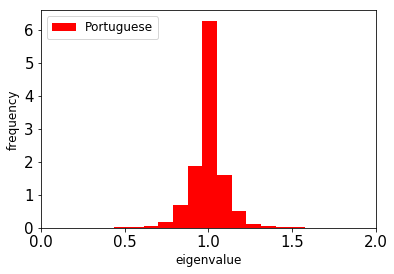

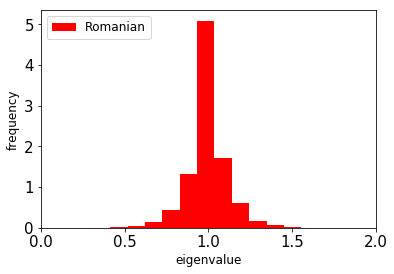

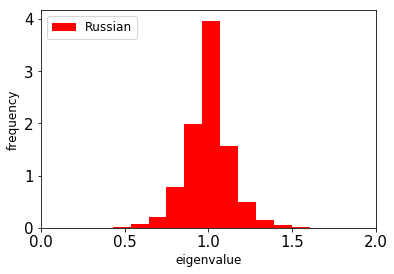

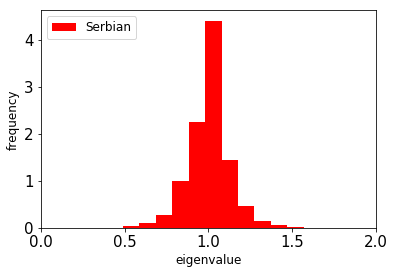

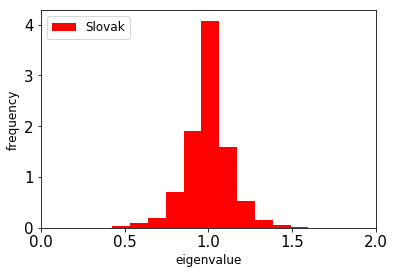

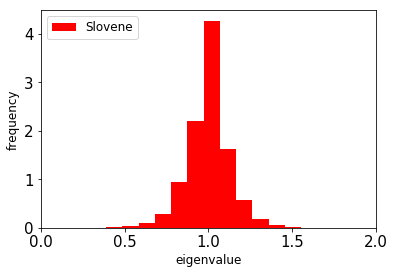

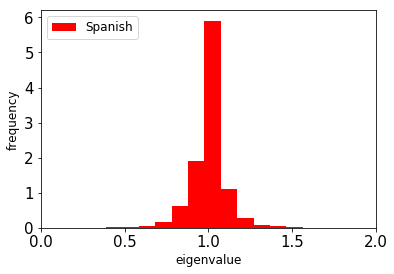

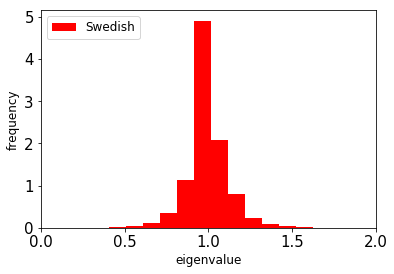

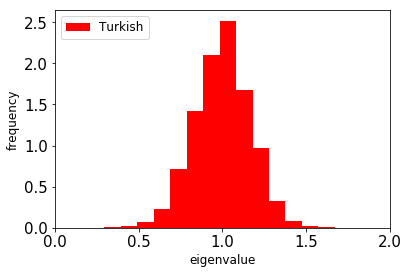

In [115]:
for language in language_names:
    data = np.array(eigs_adj[language])
    plt.xlim([0., 2])
    plt.hist(data, bins='doane', cumulative=False, histtype='stepfilled',stacked=False,density=True,linewidth=1.25, color='r',label=language)

    plt.legend(loc='upper left',fontsize=12)
    plt.xlabel('eigenvalue',fontsize=12)
    plt.ylabel('frequency',fontsize=12)
    plt.rcParams.update({'font.size': 15})
    plt.savefig('hist_'+language+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()

## Laplacian energy

In [40]:
def energy(G):
    M=nx.normalized_laplacian_matrix(G,weight='weight').todense()
    eigs=LA.eigvals(M)
    eigs=[np.abs(x-np.mean(eigs)) for x in eigs]
    return sum(eigs)

In [40]:
E_adj={}
for language in language_names:
    print(language)
    E_adj[language]=energy(graphs_adj[language])

Afrikaans
Arabic
Bulgarian
Croatian
Czech
Danish
Dutch
English
Esperanto
Finnish
French
German
Greek
Hebrew
Hungarian
Icelandic
Italian
Latin
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Russian
Serbian
Slovak
Slovene
Spanish
Swedish
Turkish


In [41]:
E_adj

{'Afrikaans': 600.4506456282933,
 'Arabic': 1277.5586119724537,
 'Bulgarian': 783.0889313166039,
 'Croatian': 958.7922678027927,
 'Czech': 903.7463469658836,
 'Danish': 842.2574283028724,
 'Dutch': 712.207036428852,
 'English': 619.6318773030935,
 'Esperanto': 669.203735098959,
 'Finnish': 1129.1941962685003,
 'French': 507.7291104546166,
 'German': 694.8715414148465,
 'Greek': 589.7457790193898,
 'Hebrew': 1263.8508065878352,
 'Hungarian': 922.195314799205,
 'Icelandic': 866.6738658704485,
 'Italian': 617.5967669817737,
 'Latin': 899.7233369428168,
 'Lithuanian': 1079.9623853609198,
 'Norwegian': 734.2068419644518,
 'Polish': 886.5520690849771,
 'Portuguese': 596.1396619750128,
 'Romanian': 754.7145469406552,
 'Russian': 933.7571393369311,
 'Serbian': 846.8853416514673,
 'Slovak': 931.6776267814256,
 'Slovene': 886.2783050029809,
 'Spanish': 603.2628701002225,
 'Swedish': 775.7867315944011,
 'Turkish': 1311.6470481817462}

In [42]:
pickle.dump(E_adj,open('E_adj.p','wb'))

In [46]:
E_adj=pickle.load(open('E_adj.p','rb'))

## visualization: TSNE!
### https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [92]:
#from sklearn.decomposition import KernelPCA

X=[]
for language in language_names:
    X+=[eigs_adj[language]]
    
#X = StandardScaler().fit_transform(X)
#pca = KernelPCA(n_components=2,random_state=0,kernel='sigmoid')
#X = pca.fit(X).transform(X)

In [93]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2,perplexity=5,init='pca',random_state=0).fit_transform(X)

In [94]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

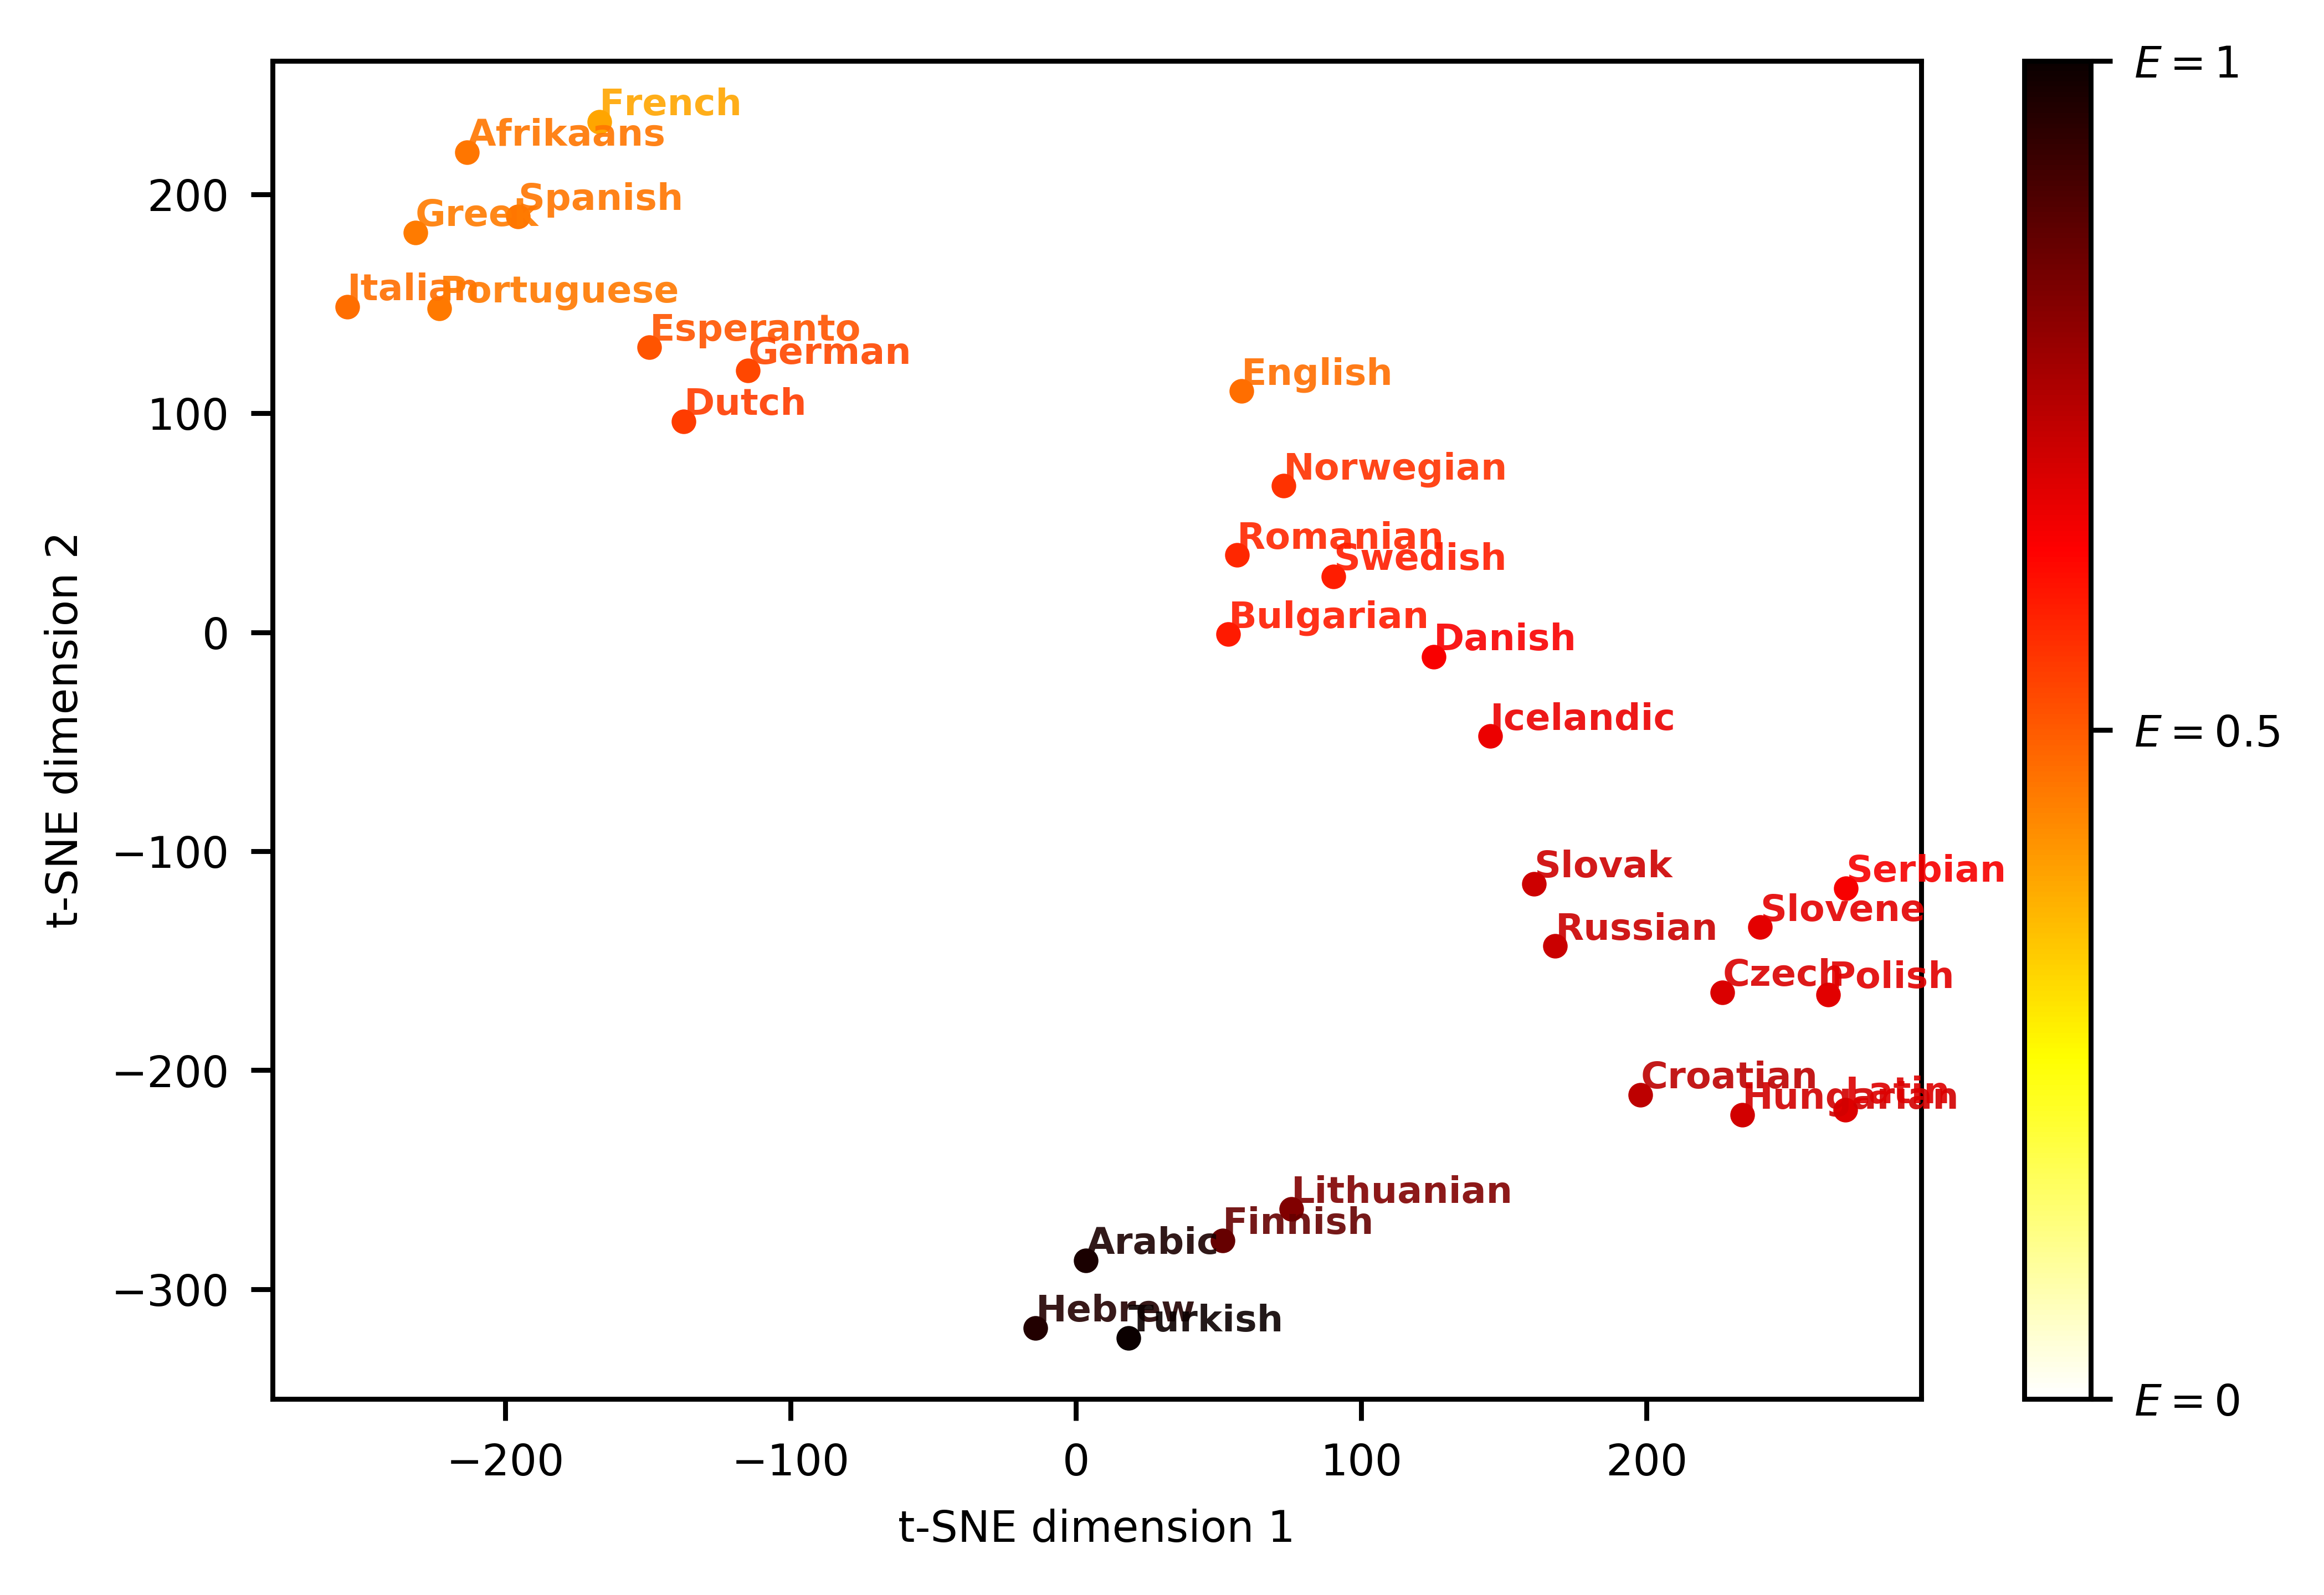

In [103]:
import matplotlib.cm as cm
import matplotlib as mpl

cmap = mpl.cm.ScalarMappable(cmap=mpl.cm.hot)
cmap.set_array([])

fig, ax = plt.subplots(dpi=800)

for i in range(len(x)):
    
    plt.plot(x[i],y[i],'o',color=cm.hot(1-E_adj[language_names[i]]/float(max(E_adj.values()))),markersize=3,markeredgewidth=1.,fillstyle='full',clip_on=True)
    #ax.plot(x[i],y[i],marker=path,markersize=75, color=colors[k_means.labels_[i]],markeredgewidth=0.5,clip_on=True)
    ax.annotate(language_names[i], alpha=0.9,weight='demi', color=cm.hot(1-E_adj[language_names[i]]/float(max(E_adj.values()))), xy=(x[i]+0.05,y[i]+3), fontsize=6)

plt.grid(False)
#plt.axis('off')
cbar=fig.colorbar(cmap,ticks=[1,0.5,0],orientation='vertical')
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels([r'$E=0$',r'$E=0.5$',r'$E=1$'], fontsize=7)
#cbar.ax.set_yticklabels([years[0],years[-1]])  # vertically oriented colorbar
plt.ylabel(r't-SNE dimension 2',fontsize=7)
plt.xlabel(r't-SNE dimension 1',fontsize=7)
plt.rcParams.update({'font.size': 7})
plt.savefig('TSNE.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## laplacian spectra distance
### https://www.sciencedirect.com/science/article/abs/pii/S0024379517303130
### https://www.sciencedirect.com/science/article/pii/S0024379511006021

In [116]:
def distance(language1,language2):
    return sum([np.abs(x-y) for x,y in zip(eigs_adj[language1],eigs_adj[language2])])  

In [117]:
laplacian_adj_distances={}
for language in eigs_adj.keys():
    laplacian_adj_distances[language]={L:distance(language,L) for L in eigs_adj.keys()}

In [118]:
df_laplacian=pd.DataFrame.from_dict(laplacian_adj_distances)

In [119]:
df_laplacian

,Afrikaans,Arabic,Bulgarian,Croatian,Czech,Danish,Dutch,English,Esperanto,Finnish,...,Polish,Portuguese,Romanian,Russian,Serbian,Slovak,Slovene,Spanish,Swedish,Turkish
Afrikaans,0.0000,678.2679,185.9320,361.2545,305.5753,242.4085,123.4119,122.2654,73.1250,529.9911,...,291.0467,62.1914,154.3597,334.3197,249.5795,331.9686,287.9549,33.7159,176.2255,712.8981
Arabic,678.2679,0.0000,495.1567,318.8500,373.9544,436.4308,566.4592,677.4383,609.4791,148.2800,...,391.1494,683.5341,524.2852,344.3008,431.0826,346.4299,391.4738,675.6738,502.3634,72.6332
Bulgarian,185.9320,495.1567,0.0000,179.0307,122.6083,63.4077,73.7109,248.0976,114.9748,346.8799,...,112.0553,188.4386,39.0445,151.0251,66.8701,148.8570,105.0343,184.3189,36.5585,529.3587
Croatian,361.2545,318.8500,179.0307,0.0000,60.6572,165.1696,248.5074,422.3043,291.1495,170.5732,...,72.4338,364.6841,214.0764,54.7772,114.2322,73.8819,77.0818,359.3042,205.2194,353.4060
Czech,305.5753,373.9544,122.6083,60.6572,0.0000,109.5300,194.6440,364.1303,235.6873,225.6776,...,17.8900,309.6521,156.6016,38.1294,59.3866,42.1605,22.6732,303.7960,146.8066,408.1564
Danish,242.4085,436.4308,63.4077,165.1696,109.5300,0.0000,130.8694,264.3807,173.0483,289.7510,...,108.8652,247.1033,88.4096,114.2802,67.5290,102.5349,91.7104,239.8056,67.1182,473.6892
Dutch,123.4119,566.4592,73.7109,248.5074,194.6440,130.8694,0.0000,237.6749,54.5297,418.1840,...,177.8296,117.1999,65.0672,222.2042,136.3008,220.0347,175.7620,118.3982,71.1036,601.1022
English,122.2654,677.4383,248.0976,422.3043,364.1303,264.3807,237.6749,0.0000,185.4820,549.4679,...,358.9861,179.4272,211.3605,374.9733,312.7117,364.3382,347.0143,145.1203,217.6097,734.9949
Esperanto,73.1250,609.4791,114.9748,291.1495,235.6873,173.0483,54.5297,185.4820,0.0000,461.2023,...,220.1599,74.0622,85.1939,265.3475,178.7957,263.1794,218.0365,70.6397,107.1157,643.6811
Finnish,529.9911,148.2800,346.8799,170.5732,225.6776,289.7510,418.1840,549.4679,461.2023,0.0000,...,242.8726,535.2573,376.0084,196.3872,282.8058,198.4075,243.1970,527.4134,354.1004,186.5916


In [125]:
M_laplacian=np.array(df_laplacian)

In [126]:
M_laplacian = StandardScaler().fit_transform(M_laplacian)

In [123]:
M_laplacian = TSNE(n_components=2,perplexity=5,random_state=0).fit_transform(M_laplacian)

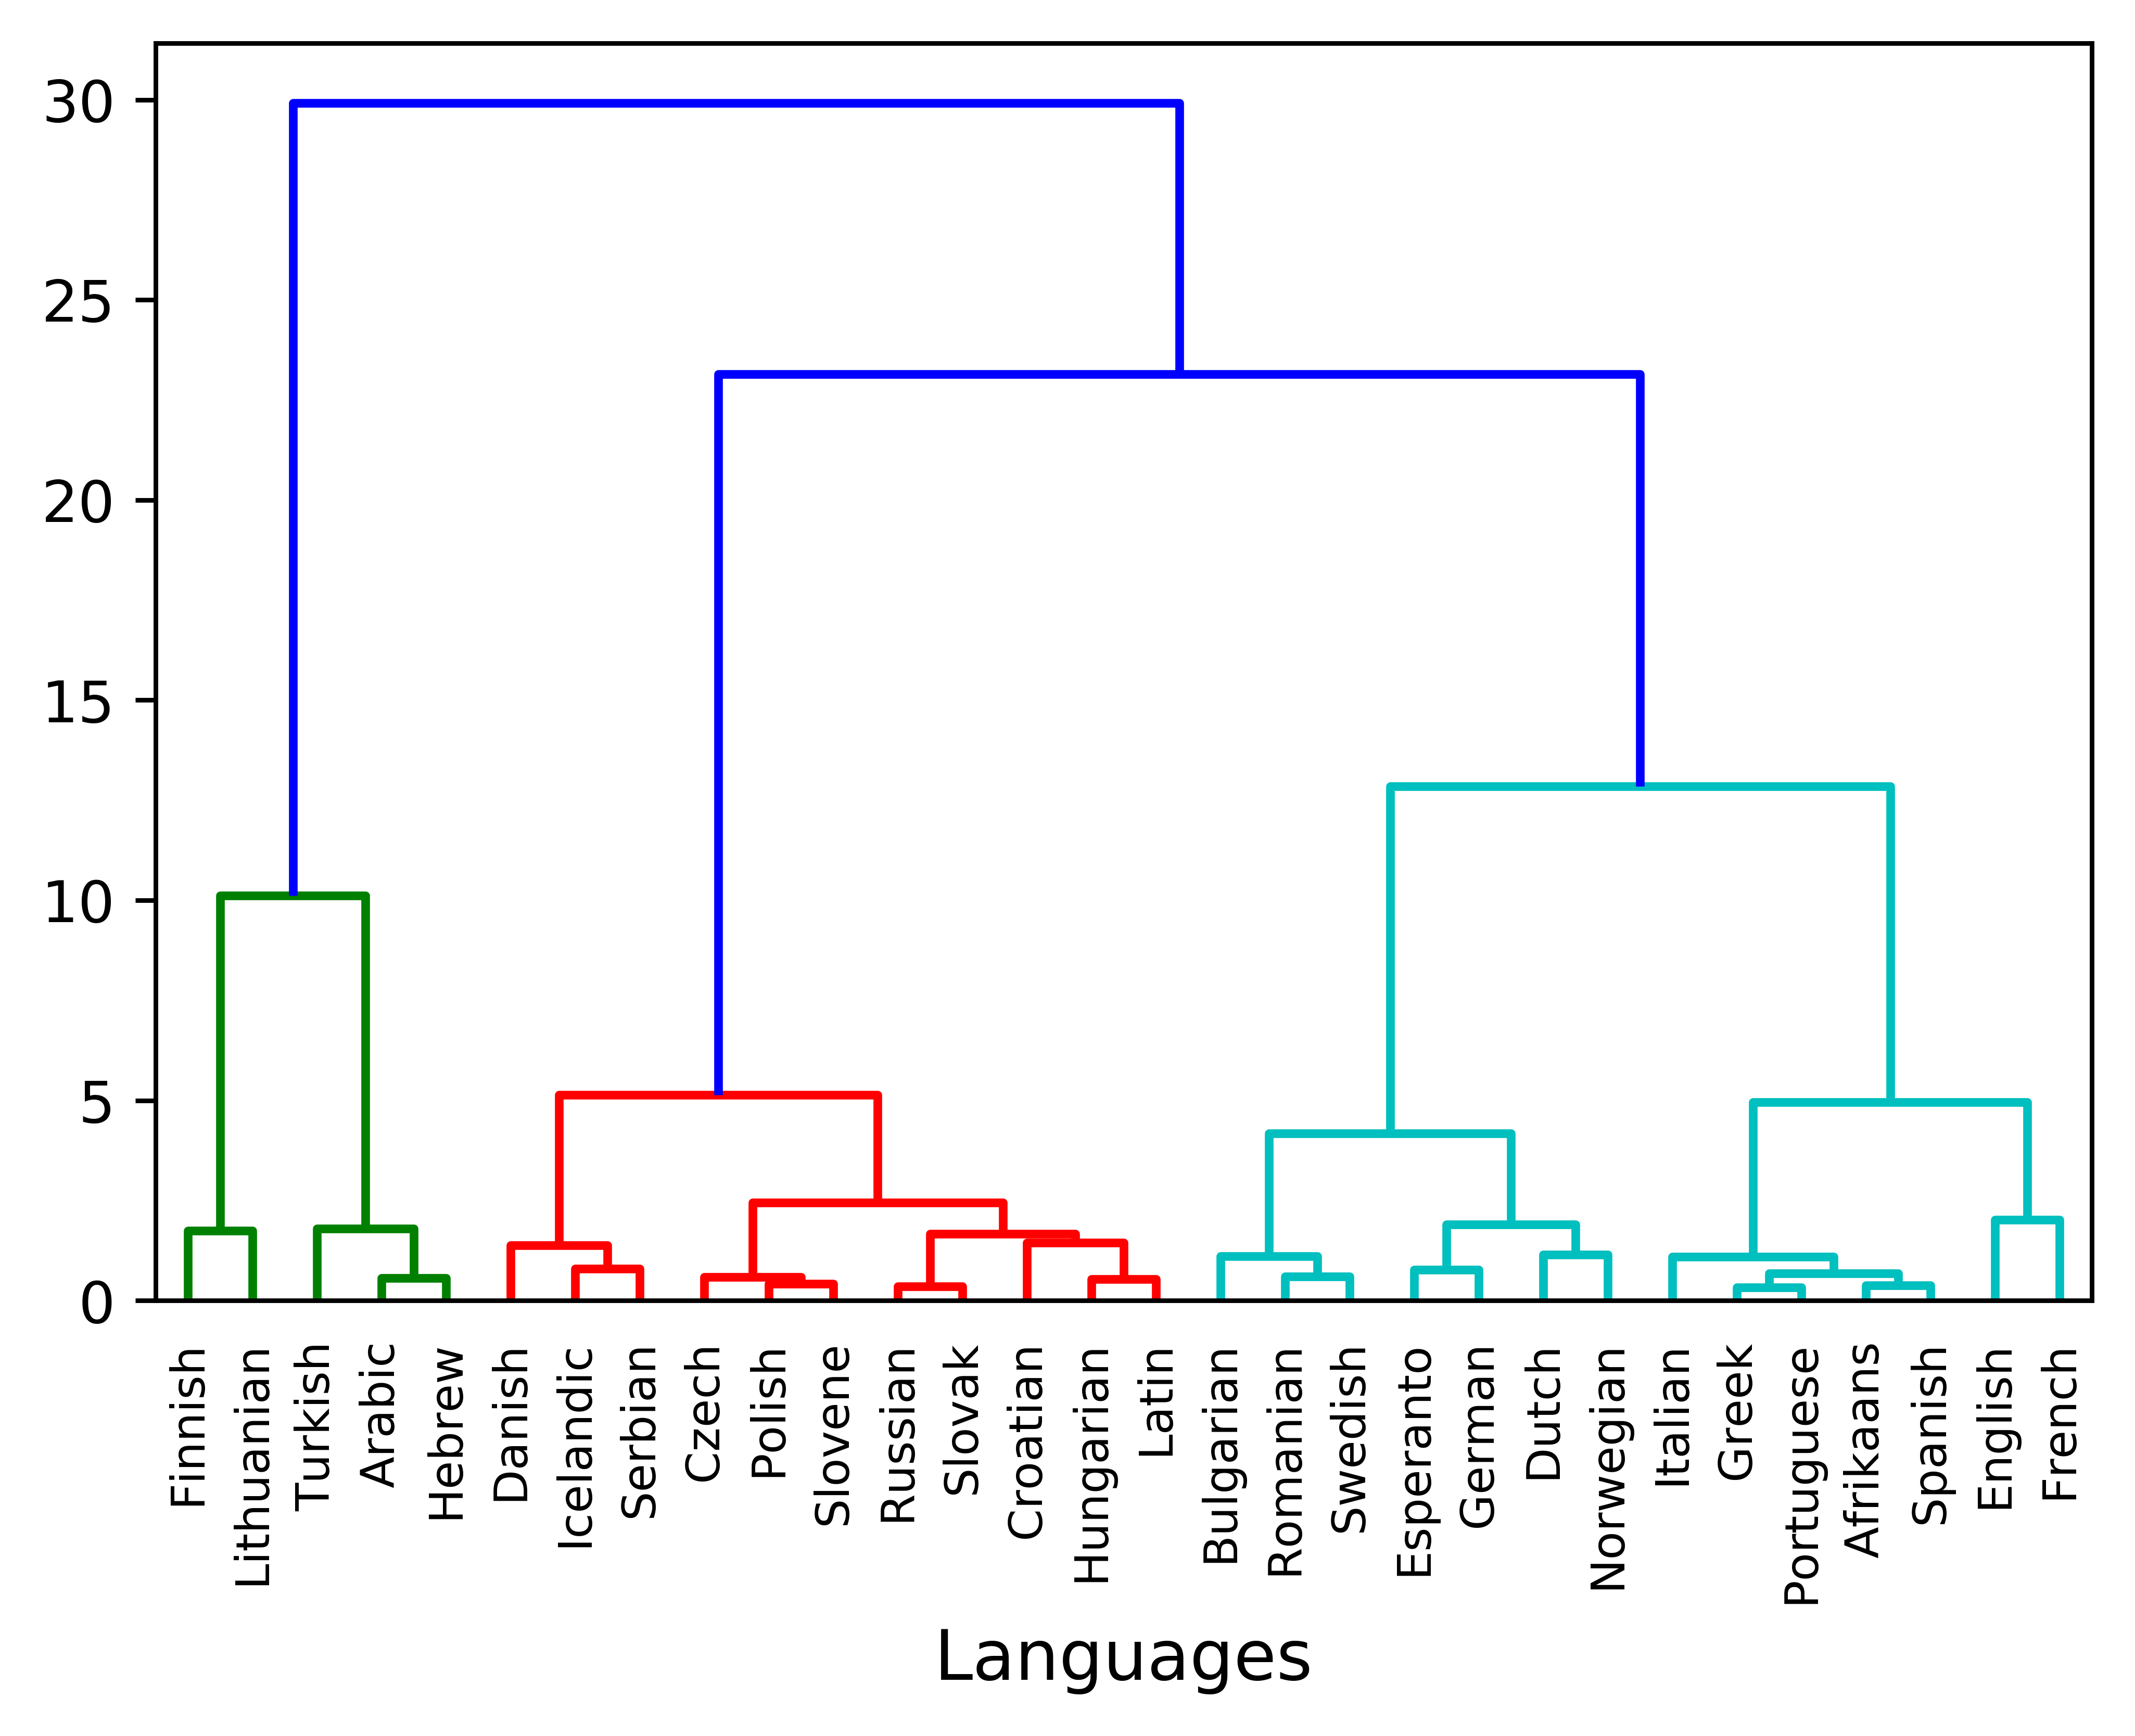

In [129]:
Z = linkage(M_laplacian, 'ward', metric='euclidean')
fig, ax = plt.subplots(dpi=800)
dn = dendrogram(Z,labels=list(laplacian_adj_distances.keys()),leaf_rotation=90.,leaf_font_size=8)
plt.xlabel(r'Languages',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('dendrogram_laplacian.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## Random ordering of sentences and then graphs are re-defined

In [1]:
## co-occurence at distance 1

import random

def GoW_random(text_clean,language):
    W=most[language]
    G=nx.Graph()
    for sentence in text_clean:
        sentence=list(filter(lambda x: x in W, sentence))
        random.shuffle(sentence)
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [50]:
graphs_random={language:[] for language in language_names}
for language in language_names:
    print(language)
    for i in range(20):
        G=GoW_random(languages[language],language)
        graphs_random[language]+=[G]

Afrikaans
Arabic
Bulgarian
Croatian
Czech
Danish
Dutch
English
Esperanto
Finnish
French
German
Greek
Hebrew
Hungarian
Icelandic
Italian
Latin
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Russian
Serbian
Slovak
Slovene
Spanish
Swedish
Turkish


In [51]:
pickle.dump(graphs_random,open('bible_graphs_random.p','wb'))

In [4]:
graphs_random=pickle.load(open('bible_graphs_random.p','rb'))

In [5]:
for language in language_names:
    print(language,len(graphs_random[language][0]))

Afrikaans 10000
Arabic 10000
Bulgarian 10000
Croatian 10000
Czech 10000
Danish 10000
Dutch 10000
English 10000
Esperanto 10000
Finnish 10000
French 10000
German 10000
Greek 10000
Hebrew 10000
Hungarian 10000
Icelandic 10000
Italian 10000
Latin 10000
Lithuanian 10000
Norwegian 10000
Polish 10000
Portuguese 10000
Romanian 10000
Russian 10000
Serbian 10000
Slovak 10000
Slovene 10000
Spanish 10000
Swedish 10000
Turkish 10000


In [6]:
def eigs_laplacian_random(language):
    L=[]
    for G in graphs_random[language]:
        M=nx.normalized_laplacian_matrix(G,weight='weight').todense()
        l=LA.eigvals(M)
        l=list(np.round_(l,4))
        l.sort()
        L+=[[np.real(x) for x in l]]
    return L

In [7]:
eigs_random={}
for language in language_names:
    print(language)
    eigs_random[language]=eigs_laplacian_random(language)

Afrikaans
Arabic
Bulgarian
Croatian
Czech
Danish
Dutch
English
Esperanto
Finnish
French
German
Greek
Hebrew
Hungarian
Icelandic
Italian
Latin
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Russian
Serbian
Slovak
Slovene
Spanish
Swedish
Turkish


In [8]:
pickle.dump(eigs_random,open('eigs_random.p','wb'))

In [22]:
eigs_random=pickle.load(open('eigs_random.p','rb'))

## one sample tests!

### energy
### H: E is lower than original one

In [42]:
def energy_random(eigs_values):
    eigs=[np.abs(x-np.mean(eigs_values)) for x in eigs_values]
    return sum(eigs)

In [43]:
E_adj_random={}
for language in language_names:
    print(language)
    E_adj_random[language]=[energy_random(eigs_random[language][i]) for i in range(20)]

Afrikaans
Arabic
Bulgarian
Croatian
Czech
Danish
Dutch
English
Esperanto
Finnish
French
German
Greek
Hebrew
Hungarian
Icelandic
Italian
Latin
Lithuanian
Norwegian
Polish
Portuguese
Romanian
Russian
Serbian
Slovak
Slovene
Spanish
Swedish
Turkish


In [52]:
pickle.dump(E_adj_random,open('E_adj_random.p','wb'))

In [50]:
E_dict={}
for language in language_names:
    true_E=E_adj[language]
    data=[E_adj_random[language][i] for i in range(20)]
    results=scipy.stats.ttest_1samp(data, true_E)
    if (results[0] < 0) & (results[1]/2 < 0.05):
        E_dict[language]=True
    else:
        E_dict[language]=False

In [51]:
E_dict

{'Afrikaans': False,
 'Arabic': True,
 'Bulgarian': False,
 'Croatian': True,
 'Czech': True,
 'Danish': True,
 'Dutch': False,
 'English': False,
 'Esperanto': False,
 'Finnish': True,
 'French': False,
 'German': False,
 'Greek': False,
 'Hebrew': True,
 'Hungarian': True,
 'Icelandic': True,
 'Italian': False,
 'Latin': False,
 'Lithuanian': True,
 'Norwegian': False,
 'Polish': True,
 'Portuguese': False,
 'Romanian': False,
 'Russian': True,
 'Serbian': True,
 'Slovak': True,
 'Slovene': True,
 'Spanish': False,
 'Swedish': True,
 'Turkish': True}

In [70]:
import operator

sorted_E = sorted(E_adj.items(), key=operator.itemgetter(1), reverse=True)

In [71]:
sorted_E =[list(triad)+[np.mean(E_adj_random[triad[0]])]+[E_dict[triad[0]]] for triad in sorted_E]

In [72]:
sorted_E

[['Turkish', 1311.6470481817462, 1073.516790569, True],
 ['Arabic', 1277.5586119724537, 1090.9533491010002, True],
 ['Hebrew', 1263.8508065878352, 1120.2434095750007, True],
 ['Finnish', 1129.1941962685003, 943.4066871609999, True],
 ['Lithuanian', 1079.9623853609198, 999.0163950259991, True],
 ['Croatian', 958.7922678027927, 882.9797320599997, True],
 ['Russian', 933.7571393369311, 889.4792225680001, True],
 ['Slovak', 931.6776267814256, 836.4089171449996, True],
 ['Hungarian', 922.195314799205, 873.451421025, True],
 ['Czech', 903.7463469658836, 848.4387538769997, True],
 ['Latin', 899.7233369428168, 904.041220506, False],
 ['Polish', 886.5520690849771, 842.9077030880002, True],
 ['Slovene', 886.2783050029809, 813.447077596, True],
 ['Icelandic', 866.6738658704485, 808.808989226, True],
 ['Serbian', 846.8853416514673, 844.189055688001, True],
 ['Danish', 842.2574283028724, 814.1342812299991, True],
 ['Bulgarian', 783.0889313166039, 802.1750578790002, False],
 ['Swedish', 775.78673159

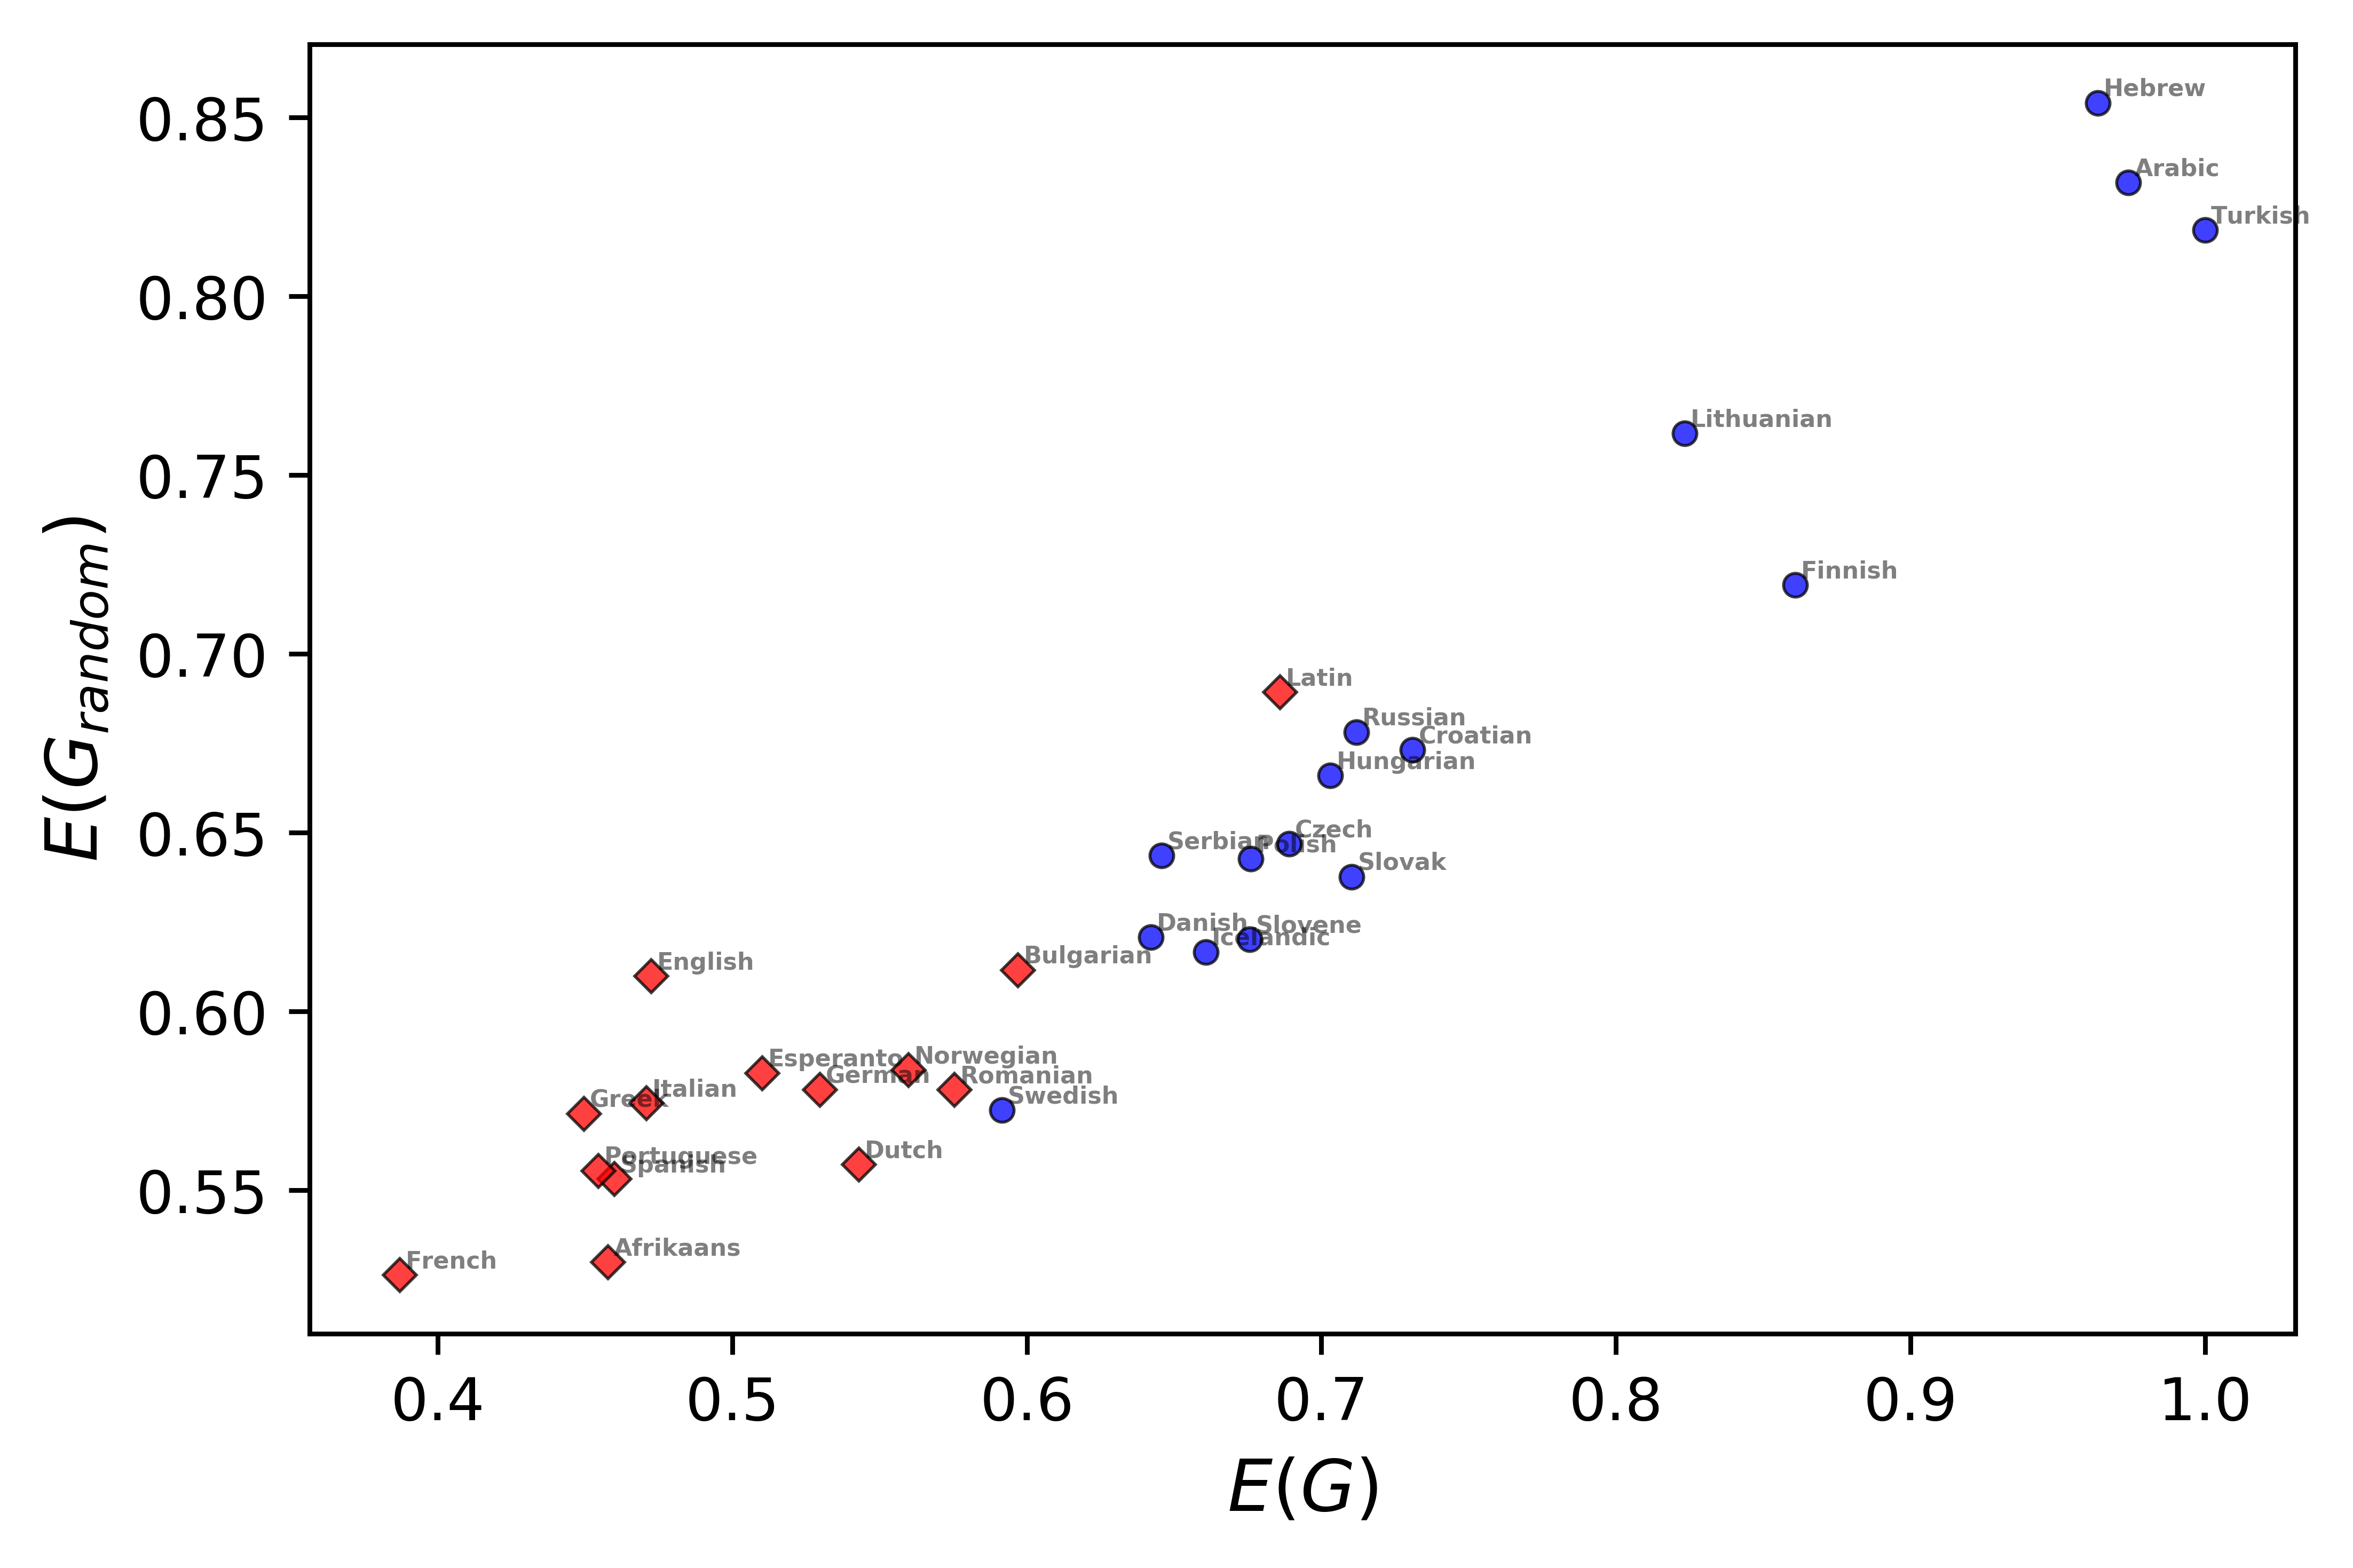

In [94]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

colors=[['b','o'] if list(zip(*sorted_E))[3][i] == True else ['r','D'] for i in range(len(language_names))]

for i in range(len(sorted_E)):
    x=list(zip(*sorted_E))[1][i]/float(list(zip(*sorted_E))[1][0])
    y=list(zip(*sorted_E))[2][i]/float(list(zip(*sorted_E))[1][0])

    ax.plot(x,y,colors[i][1],color=colors[i][0],markersize=4,markeredgecolor='k',markeredgewidth=0.5,alpha=0.75,fillstyle='full',clip_on=True)
    ax.annotate(list(zip(*sorted_E))[0][i], weight='demi', color='k', xy=(x+0.002,y+0.002), fontsize=4, alpha=0.5)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'$E(G_{random})$',fontsize=12)
plt.xlabel(r'$E(G)$',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('EvsE_random.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### max eigenvalue
### H: maximum eigenvalue is lower than original one

In [30]:
max_dict={}
for language in language_names:
    true_max=max(eigs_adj[language])
    data=[max(eigs_random[language][i]) for i in range(20)]
    results=scipy.stats.ttest_1samp(data, true_max)
    if (results[0] < 0) & (results[1]/2 < 0.05):
        max_dict[language]=True
    else:
        max_dict[language]=False

In [31]:
max_dict

{'Afrikaans': True,
 'Arabic': True,
 'Bulgarian': True,
 'Croatian': True,
 'Czech': True,
 'Danish': True,
 'Dutch': True,
 'English': False,
 'Esperanto': True,
 'Finnish': True,
 'French': True,
 'German': True,
 'Greek': True,
 'Hebrew': True,
 'Hungarian': True,
 'Icelandic': False,
 'Italian': True,
 'Latin': True,
 'Lithuanian': True,
 'Norwegian': True,
 'Polish': True,
 'Portuguese': True,
 'Romanian': True,
 'Russian': True,
 'Serbian': True,
 'Slovak': True,
 'Slovene': True,
 'Spanish': True,
 'Swedish': True,
 'Turkish': True}

### second eigenvalue
### H: second eigenvalue is greater than original one

In [36]:
second_dict={}
for language in language_names:
    true_second=eigs_adj[language][1]
    data=[eigs_random[language][i][1] for i in range(20)]
    results=scipy.stats.ttest_1samp(data, true_second)
    if (results[0] > 0) & (results[1]/2 < 0.05):
        second_dict[language]=True
    else:
        second_dict[language]=False

In [37]:
second_dict

{'Afrikaans': True,
 'Arabic': True,
 'Bulgarian': True,
 'Croatian': True,
 'Czech': True,
 'Danish': True,
 'Dutch': True,
 'English': False,
 'Esperanto': True,
 'Finnish': True,
 'French': True,
 'German': True,
 'Greek': True,
 'Hebrew': True,
 'Hungarian': True,
 'Icelandic': False,
 'Italian': True,
 'Latin': True,
 'Lithuanian': True,
 'Norwegian': True,
 'Polish': True,
 'Portuguese': True,
 'Romanian': True,
 'Russian': True,
 'Serbian': True,
 'Slovak': True,
 'Slovene': True,
 'Spanish': True,
 'Swedish': True,
 'Turkish': True}

### mean eigenvalue
### H: mean eigenvalue is lower than original one

In [53]:
mean_dict={}
for language in language_names:
    true_mean=np.mean(eigs_adj[language])
    data=[np.mean(eigs_random[language][i]) for i in range(20)]
    results=scipy.stats.ttest_1samp(data, true_mean)
    if (results[0] < 0) & (results[1]/2 < 0.05):
        mean_dict[language]=True
    else:
        mean_dict[language]=False

In [54]:
mean_dict

{'Afrikaans': True,
 'Arabic': True,
 'Bulgarian': True,
 'Croatian': True,
 'Czech': True,
 'Danish': True,
 'Dutch': True,
 'English': True,
 'Esperanto': True,
 'Finnish': True,
 'French': True,
 'German': True,
 'Greek': True,
 'Hebrew': True,
 'Hungarian': True,
 'Icelandic': True,
 'Italian': True,
 'Latin': True,
 'Lithuanian': True,
 'Norwegian': True,
 'Polish': True,
 'Portuguese': True,
 'Romanian': True,
 'Russian': True,
 'Serbian': True,
 'Slovak': True,
 'Slovene': True,
 'Spanish': True,
 'Swedish': True,
 'Turkish': True}